# Figure 2: Model Reliance on Frequency Groups and ROI

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import scipy.io as io
import os
from functions.helpers import *

# Set plotting defaults
plt.rcParams["font.family"] = "Arial"
plt.style.use('default')
sns.set_style("whitegrid")
font = {'size'   : 10}
mpl.rc('font', **font)
mpl.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})

In [7]:
# Load data
roi_mr = pd.read_csv('results/roi_mr.csv')
freq_mr = pd.read_csv('results/freq_mr.csv')

In [8]:
# Reshape data wide to long
roi_mr_m = pd.melt(roi_mr, id_vars=['id'], value_vars=['leftocci', 'rightocci', 'occipitocentral', 
                            'central', 'leftcentral', 'rightcentral', 
                            'frontocentral', 'leftfrontal', 'rightfrontal'],
                             var_name='feature', value_name='mr')
freq_mr_m = pd.melt(freq_mr, id_vars=['id'], value_vars=['delta','theta','alpha',
                                      'beta','gamma'],
                             var_name='feature', value_name='mr')

# Rescale MR to percent
roi_mr_m['mr'] *= 100 
freq_mr_m['mr'] *= 100 

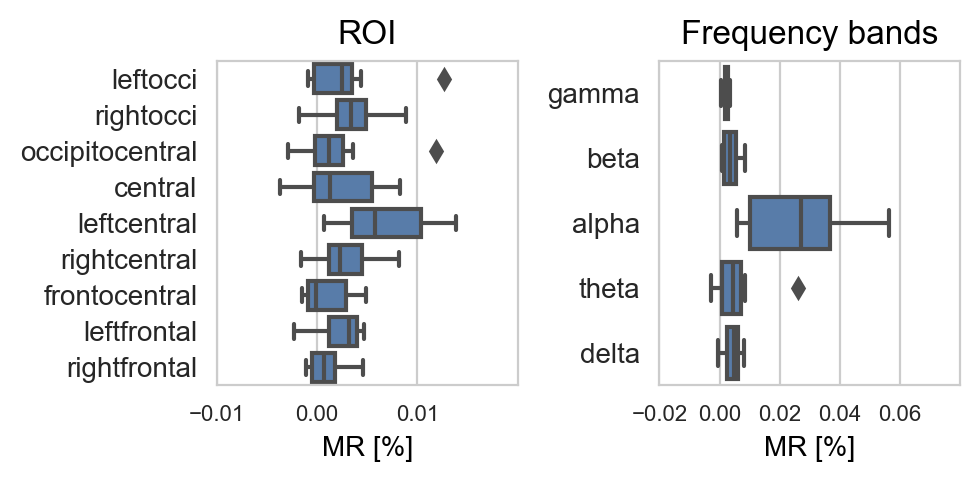

In [9]:
# Build plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5))

sns.boxplot(y="feature", x="mr", data=roi_mr_m,
        color="#4a7ab7", ax = ax1)

ax1.grid(False)
ax1.xaxis.grid(True)
ax1.set_xlim(-0.01,0.02)
ax1.set_xticks(np.arange(-0.01,0.02, 0.01))
ax1.tick_params(axis='x', which='major', labelsize=8)

ax1.set_ylabel("")
ax1.set_xlabel("MR [%]")
ax1.set_title("ROI") 



sns.set_style("whitegrid")


sns.boxplot(y="feature", x="mr", data=freq_mr_m,
        color="#4a7ab7", ax = ax2)
ax2.grid(False)
ax2.xaxis.grid(True)
ax2.set_xlim(-0.02,0.08)
ax2.set_xticks(np.arange(-0.02,0.08, 0.02))
ax2.tick_params(axis='x', which='major', labelsize=8)
ax2.invert_yaxis()

plt.ylabel("")
plt.title("Frequency bands")
plt.xlabel("MR [%]")
plt.tight_layout()
plt.savefig('plots/Fig2.eps') 